# Testing Jupyter Notebook
## Using School Data

In [1]:
import csv
from functions import School, plot

In [2]:

# open the file and get the data of each school into a class
# then put all the schools' classes into an array
school_data= []

# visited maps the school code to the index of the school in school_data
visited = {}
with open("school.csv", mode="r", encoding="utf8") as file:
  csvfile = list(csv.reader(file, delimiter=','))
  # set an array to know the attributes, i.e. the name of each column
  school_interface = csvfile.pop(0)
  idx = 0
  for row in csvfile:
    id, school_code, school_name, year, enrolment = row[0], row[1], row[2], row[3], row[4]
    if (school_code in visited):
      # new data for the same school
      school = school_data[visited[school_code]]
      school._add_enrolment(year, enrolment)
    else:
      # the school does not exist in the school_data yet
      new_school = School(id, school_code, school_name, year, enrolment)
      school_data.append(new_school)
      visited[school_code] = idx
      idx += 1

# print out the data
school_data_len = len(school_data)
# for i in range(school_data_len):
#   school_data[i]._school_print()
print(school_interface)
print(f"The number of Schools: {school_data_len}")

['Id', 'School Code', 'School Name', 'Year', 'Enrolment']
The number of Schools: 71


1999 : 24069
2000 : 23673
2001 : 23429
2002 : 23219
2003 : 22885
2004 : 22374
2005 : 21927
2006 : 21364
2007 : 20813
2008 : 20324
2009 : 19955
2010 : 21162
2011 : 20831
2012 : 20406
2013 : 20131
2014 : 19938
2015 : 19691
2016 : 19902
2017 : 20186
2018 : 20361
2019 : 20734


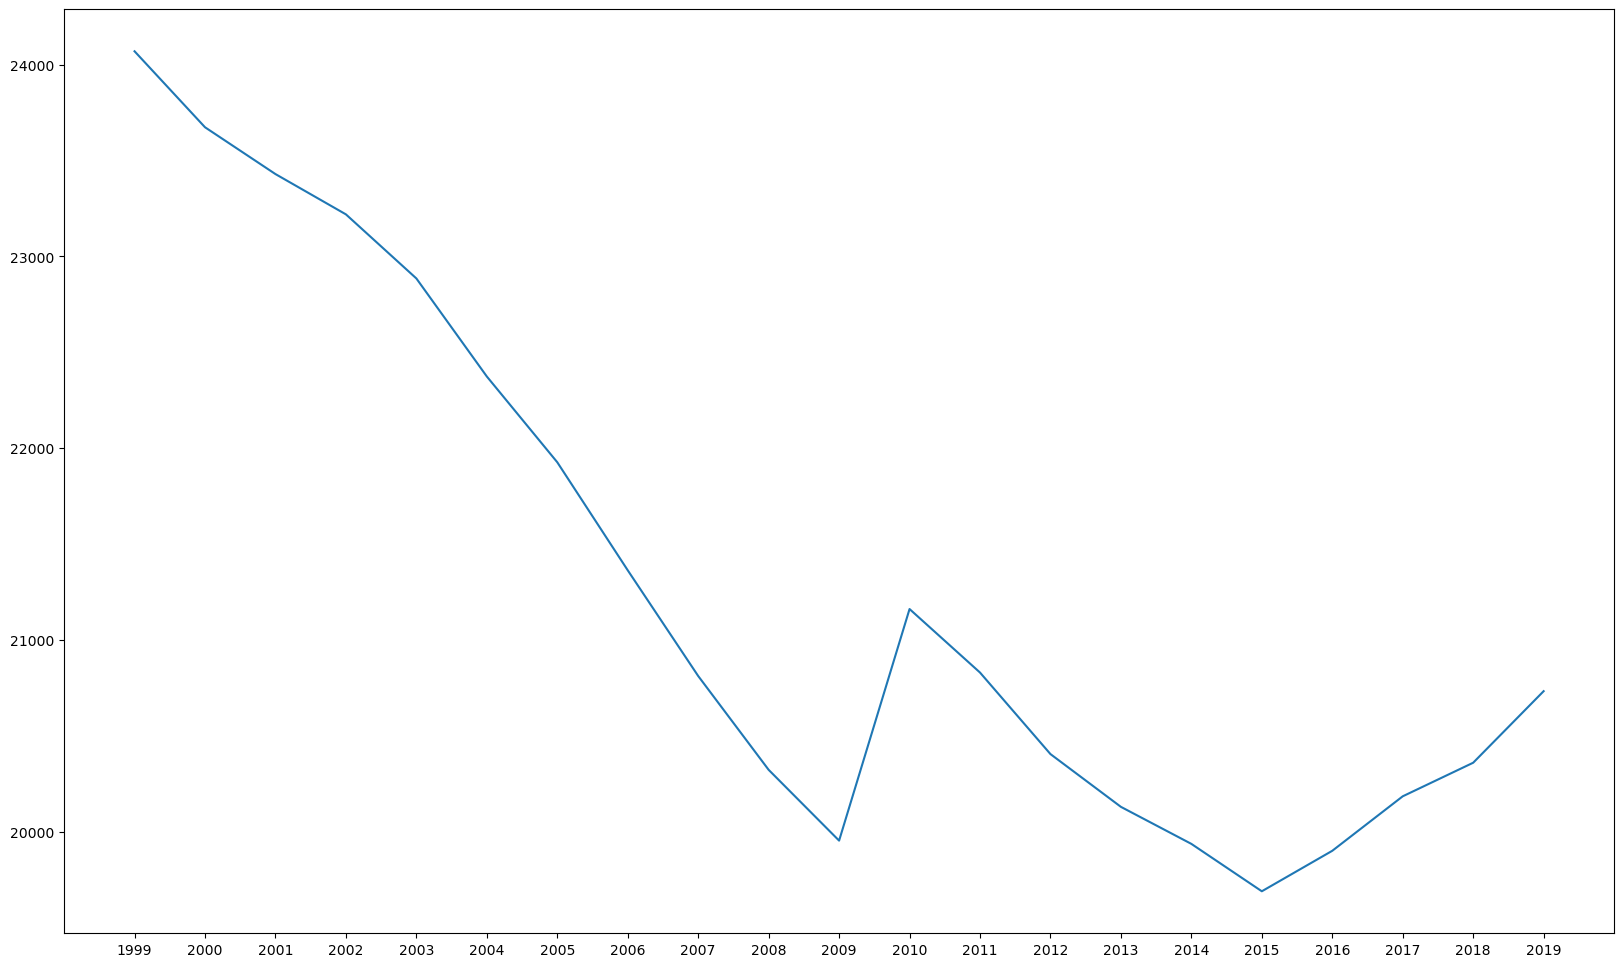

In [3]:
# let's get the total enrolment given a year
year_enrolment = {}

for school in school_data:
  for year, enrolment in school.all_enrolment.items():
    if (year in year_enrolment):
      year_enrolment[year] += int(enrolment)
    else:
      year_enrolment[year] = int(enrolment)
  
for year, total_enrolment in year_enrolment.items():
  print(f"{year} : {total_enrolment}")

plot(list(year_enrolment.keys()), list(year_enrolment.values()))

The data is not linear so at this moment, I have no idea how to train a model (using machine learning) to predict the enrolment for the coming years